## Loading the data

In [1]:
import pandas
from sklearn.datasets import load_boston # deprecated

X, y = load_boston(return_X_y=True)
df = pandas.DataFrame(X, columns=['crim','zn','indus','chas','nox',
                              'rm','age','dis','rad','tax','ptratio',
                              'b','lstat'])

In [2]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
lstat = df['lstat'] > df['lstat'].median()

In [6]:
y_cat = y > y.mean()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('log_reg', LogisticRegression())
])

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
Xtr, Xte, ytr, yte, ztr, zte = train_test_split(
df.drop(columns=['b', 'lstat']).assign(z=lstat), y_cat, lstat, test_size=0.3
)

In [14]:
model.fit(Xtr, ytr)

Pipeline(steps=[('scale', StandardScaler()), ('log_reg', LogisticRegression())])

In [15]:
p_pred = model.predict_proba(Xte)

In [18]:
p_pred[:5,:]

array([[0.82825636, 0.17174364],
       [0.99568274, 0.00431726],
       [0.00172622, 0.99827378],
       [0.96464533, 0.03535467],
       [0.02605377, 0.97394623]])

In [22]:
pred = p_pred[:, 1] >= 0.5

In [23]:
pred[zte].mean()

0.01282051282051282

In [24]:
pred[~zte].mean()

0.8783783783783784

In [25]:
from sklego.metrics import p_percent_score, equal_opportunity_score

In [27]:
Xte

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,z
363,4.22239,0.0,18.10,1.0,0.7700,5.803,89.0,1.9047,24.0,666.0,20.2,True
413,28.65580,0.0,18.10,0.0,0.5970,5.155,100.0,1.5894,24.0,666.0,20.2,True
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,False
407,11.95110,0.0,18.10,0.0,0.6590,5.608,100.0,1.2852,24.0,666.0,20.2,True
189,0.08370,45.0,3.44,0.0,0.4370,7.185,38.9,4.5667,5.0,398.0,15.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.08014,0.0,5.96,0.0,0.4990,5.850,41.5,3.9342,5.0,279.0,19.2,False
38,0.17505,0.0,5.96,0.0,0.4990,5.966,30.2,3.8473,5.0,279.0,19.2,False
467,4.42228,0.0,18.10,0.0,0.5840,6.003,94.5,2.5403,24.0,666.0,20.2,True
475,6.39312,0.0,18.10,0.0,0.5840,6.162,97.4,2.2060,24.0,666.0,20.2,True


In [28]:
p_percent_score('z')(model, Xte)

0.014595660749506903

In [29]:
pred[zte].mean()/pred[~zte].mean()

0.014595660749506903

In [30]:
pred[zte & yte].mean()

0.14285714285714285

In [31]:
pred[~zte & yte].mean()

0.9629629629629629

In [32]:
pred[zte & yte].mean() / pred[~zte & yte].mean()

0.14835164835164835

In [34]:
equal_opportunity_score('z')(model, Xte, yte)

0.14835164835164835

In [35]:
from sklearn.metrics import roc_curve

In [36]:
tpr, fpr, ts = roc_curve(yte, p_pred[:, 1])

In [38]:
import matplotlib.pyplot as plt

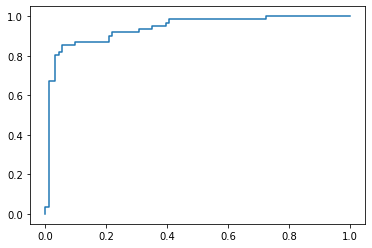

In [39]:
plt.plot(tpr, fpr)

In [40]:
tpr1, fpr1, ts1 = roc_curve(yte[zte], p_pred[zte][:, 1])
tpr0, fpr0, ts0 = roc_curve(yte[~zte], p_pred[~zte][:, 1])

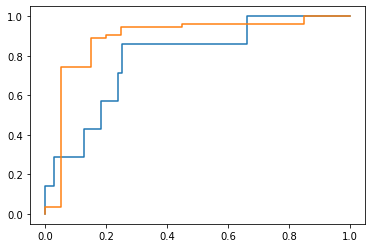

In [41]:
plt.plot(tpr1, fpr1)
plt.plot(tpr0, fpr0)

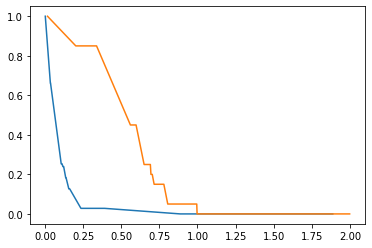

In [51]:
plt.plot(ts1, tpr1)
plt.plot(ts0, tpr0)

In [45]:
import numpy

In [46]:
fair_pred = numpy.full(pred.shape, bool)

In [47]:
fair_pred[zte] = p_pred[zte][:, 1] > 0.2
fair_pred[~zte] = p_pred[~zte][:, 1] > 0.8

In [48]:
fair_pred[zte&yte].mean()

0.2857142857142857

In [49]:
fair_pred[~zte&yte].mean()

0.7407407407407407

In [50]:
fair_pred[zte&yte].mean() / fair_pred[~zte&yte].mean()

0.38571428571428573